In [ ]:
from collections import Counter
import cv2
import math
import numpy as np
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import random
from random import randint
import re
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/My Drive/pics/"

In [ ]:
def files_in_folder(folder_path):
  '''
  Returns a list of strings where each entry is a file in the folder_path.
  
  Parameters
  ----------
  
  folder_path : str
     A string to folder for which the file listing is returned.
     
  '''
  files_A = !ls "{folder_path}"
  # The files when listed from Google Drive have a particular format. They are
  # grouped in sets of 4 and have spaces and tabs as delimiters.
  
  # Split the string listing sets of 4 files by tab and space and remove any 
  # empty splits.
  files_B = [list(filter(None, re.split('\t|\s', files))) for files in files_A]
  
  # Concatenate all splits into a single sorted list
  files_C = []
  for element in files_B:
    files_C = files_C + element
  files_C.sort()
  
  return files_C

In [ ]:
photos = files_in_folder(PATH)
print(photos)
# Shuffle the dataset
np.random.shuffle(photos)

['0_A_plate_AL07_0.png.png', '0_A_plate_AO60_0.png.png', '0_B_plate_BI90_1.png.png', '0_B_plate_BU03_1.png.png', '0_C_plate_CS20_0.png.png', '0_D_plate_DB00_0.png.png', '0_D_plate_DI80_1.png.png', '0_D_plate_DS40_0.png.png', '0_E_plate_ED30_0.png.png', '0_E_plate_EP00_1.png.png', '0_F_plate_FP30_0.png.png', '0_G_plate_GJ03_1.png.png', '0_G_plate_GZ09_1.png.png', '0_H_plate_HN07_2.png.png', '0_H_plate_HQ50_0.png.png', '0_H_plate_HW90_0.png.png', '0_I_plate_IJ08_1.png.png', '0_I_plate_IM08_1.png.png', '0_I_plate_IO10_0.png.png', '0_J_plate_JB08_0.png.png', '0_J_plate_JL70_1.png.png', '0_J_plate_JX09_1.png.png', '0_K_plate_KF80_0.png.png', '0_K_plate_KG60_0.png.png', '0_K_plate_KR40_1.png.png', '0_L_plate_LF07_1.png.png', '0_L_plate_LP05_1.png.png', '0_M_plate_MA00_0.png.png', '0_M_plate_MA00_1.png.png', '0_M_plate_MS70_0.png.png', '0_N_plate_NE40_0.png.png', '0_P_plate_PZ30.png.png', '0_Q_plate_QC20.png.png', '0_Q_plate_QR30.png.png', '0_R_plate_RL01.png.png', '0_R_plate_RL10.png.png', '

In [ ]:
datasetX = []
datasetY = []

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
#print(np.concatenate(convert_to_one_hot(np.array([0]),36))[1])

In [ ]:
for photo in photos:
  datasetX.append((np.array(Image.open(f'{PATH}/{photo}')))/255)
  if photo[0] == '0':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([0]),36)))
  elif photo[0] == '1':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([1]),36)))  
  elif photo[0] == '2':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([2]),36)))
  elif photo[0] == '3':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([3]),36)))
  elif photo[0] == '4':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([4]),36)))
  elif photo[0] == '5':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([5]),36)))
  elif photo[0] == '6':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([6]),36)))
  elif photo[0] == '7':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([7]),36)))
  elif photo[0] == '8':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([8]),36)))
  elif photo[0] == '9':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([9]),36)))
  elif photo[0] == 'A':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([10]),36)))
  elif photo[0] == 'B':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([11]),36)))
  elif photo[0] == 'C':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([12]),36)))
  elif photo[0] == 'D':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([13]),36)))
  elif photo[0] == 'E':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([14]),36)))
  elif photo[0] == 'F':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([15]),36)))
  elif photo[0] == 'G':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([16]),36)))
  elif photo[0] == 'H':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([17]),36)))
  elif photo[0] == 'I':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([18]),36)))
  elif photo[0] == 'J':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([19]),36)))
  elif photo[0] == 'K':  
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([20]),36)))
  elif photo[0] == 'L':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([21]),36)))
  elif photo[0] == 'M':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([22]),36)))
  elif photo[0] == 'N':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([23]),36)))
  elif photo[0] == 'O':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([24]),36)))
  elif photo[0] == 'P':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([25]),36)))
  elif photo[0] == 'Q':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([26]),36)))
  elif photo[0] == 'R':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([27]),36)))
  elif photo[0] == 'S':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([28]),36)))
  elif photo[0] == 'T':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([29]),36)))
  elif photo[0] == 'U':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([30]),36)))
  elif photo[0] == 'V':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([31]),36)))
  elif photo[0] == 'W':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([32]),36)))
  elif photo[0] == 'X':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([33]),36)))
  elif photo[0] == 'Y':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([34]),36)))
  elif photo[0] == 'Z':
    datasetY.append(np.concatenate(convert_to_one_hot(np.array([35]),36)))

In [ ]:
#print(datasetX)
#print(datasetY)
#print(len(datasetX))
#print(len(datasetY))
print(np.asarray(datasetX).shape)
print(np.asarray(datasetY)[0])

(930, 298, 95, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Use tensorflow 1.x so it's compatible with ROS Melodic
%tensorflow_version 1.14.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def reset_weights(model):
    session = backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

In [ ]:
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(298, 95, 3)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(36, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])

In [ ]:
reset_weights(conv_model)

In [ ]:
VALIDATION_SPLIT = 0.2
history_conv = conv_model.fit(np.asarray(datasetX), np.asarray(datasetY), 
                              validation_split=VALIDATION_SPLIT, 
                              epochs=30, 
                              batch_size=40)

Train on 744 samples, validate on 186 samples
Epoch 1/30
744/744 [==============================] - 6s 8ms/sample - loss: 3.6381 - acc: 0.0954 - val_loss: 3.0274 - val_acc: 0.2312
Epoch 2/30
744/744 [==============================] - 1s 2ms/sample - loss: 2.7963 - acc: 0.2957 - val_loss: 2.3545 - val_acc: 0.4892
Epoch 3/30
744/744 [==============================] - 1s 2ms/sample - loss: 2.1656 - acc: 0.4946 - val_loss: 1.9051 - val_acc: 0.5806
Epoch 4/30
744/744 [==============================] - 1s 2ms/sample - loss: 1.6679 - acc: 0.6142 - val_loss: 1.6745 - val_acc: 0.6237
Epoch 5/30
744/744 [==============================] - 1s 2ms/sample - loss: 1.4050 - acc: 0.6519 - val_loss: 1.5168 - val_acc: 0.6290
Epoch 6/30
744/744 [==============================] - 1s 2ms/sample - loss: 1.1940 - acc: 0.6855 - val_loss: 1.5140 - val_acc: 0.6344
Epoch 7/30
744/744 [==============================] - 1s 2ms/sample - loss: 0.9946 - acc: 0.7406 - val_loss: 1.5723 - val_acc: 0.6613
Epoch 8/30
744/7

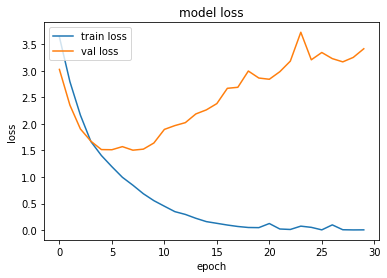

In [ ]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

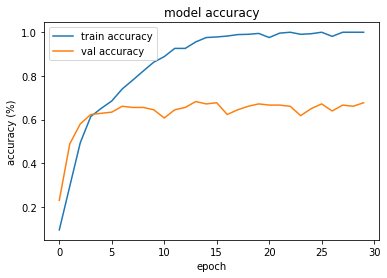

In [ ]:
plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

In [ ]:
from ipywidgets import interact
import ipywidgets as ipywidgets
# Display images in the training data set. 
def displayImage(index):
  img = datasetX[index]
  
  img_aug = np.expand_dims(img, axis=0)
  y_predict = conv_model.predict(img_aug)[0]
  
  plt.imshow(img) 
  print("Truth:\n")
  print(np.argmax(np.asarray(datasetY)[index]) )
  print("\nPredicted:\n")
  print(np.argmax(y_predict))


interact(displayImage, 
        index=ipywidgets.IntSlider(min=0, max=np.asarray(datasetX).shape[0],
                                   step=1, value=10))

interactive(children=(IntSlider(value=10, description='index', max=930), Output()), _dom_classes=('widget-inte…

<function __main__.displayImage>

In [ ]:
# makes the output folder /content/pictures/
!mkdir model

In [ ]:
!pip install h5py==2.10.0 --force-reinstall

     |████████████████████████████████| 2.9 MB 25.3 MB/s 
     |████████████████████████████████| 15.7 MB 61.8 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.5.3 which is incompatible.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.21.5 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, b

In [ ]:
conv_model.save("conv_model.h5")